# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseStudyData = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')
# Display the data table for preview
MouseStudyData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice.
MiceInStudy = len(pd.unique(MouseStudyData['Mouse ID']))
MiceInStudy

249

In [114]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_g989 = MouseStudyData[MouseStudyData.duplicated(['Mouse ID', 'Timepoint'])]
Mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [115]:
# Optional: Get all the data for the duplicate mouse ID. 
MiceTimeDup2 = MouseStudyData[MouseStudyData.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
MiceTimeDup2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Created a DataFrame for g989 with its associated index numbers from MouseStudyData DataFrame
# and deleted g989 from main DataFrame by g989's index number.

# Consequently, dropping all of Mouse ID = g989
IndexNameDupMouse = MouseStudyData[MouseStudyData['Mouse ID'] == 'g989'].index
CleanMiceData = MouseStudyData.drop(IndexNameDupMouse)
CleanMiceData.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice in the clean DataFrame.
MiceInStudy_two = len(pd.unique(CleanMiceData['Mouse ID']))
MiceInStudy_two

248

## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Calculating the statistics (mean, median, variance, standard deviation, and standard error of mean)
# for tumor volume.
DrugMean = CleanMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
DrugMedian = CleanMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
DrugVariance = CleanMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
DrugStdDev = CleanMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
DrugSEM = CleanMiceData.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Creating the dataframe to display the statistics for tumor volume
DrugRegmntStats_df = pd.DataFrame(
        {
            'Mean Tumor Volume' : DrugMean,
            'Median Tumor Volume' : DrugMedian,
            'Tumor Volume Variance' : DrugVariance,
            'Tumor Volume Std. Dev.': DrugStdDev,
            'Tumor Volume Std. Err.' : DrugSEM
        }
)

DrugRegmntStats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Agg_summary = CleanMiceData.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median',
                                                                               'var', 'std', 'sem']}
                                                                              )
Agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

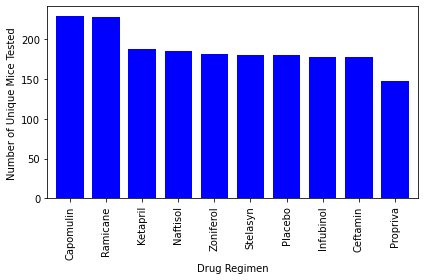

In [120]:
# GENERATE A BAR PLOT SHOWING THE TOTAL NUMBER OF UNIQUE MICE TESTED ON EACH DRUG REGMIEN USING PANDAS.

# Used .groupby to create new dataframe counting unique mice tested on each drug regimen.
MouseDrugCount = CleanMiceData.groupby('Drug Regimen')['Mouse ID'].count()

# Sorted the DataFrame to match the bar graph as required from the homework
SortMouseDrugCount = MouseDrugCount.sort_values(ascending = False)

#Plotted the bar graph using Pandas.
SortMouseDrugCount.plot(kind = 'bar', facecolor = 'blue', width = 0.77)

# Setting plot properties: x and y axis labels
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Automatically adjusting the padding between bar and the edges of the plot
plt.tight_layout()
plt.show()

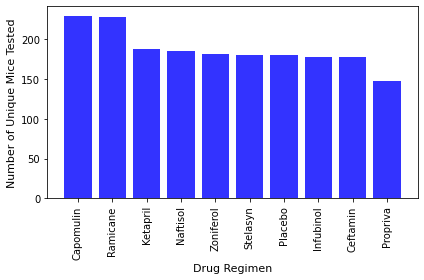

In [121]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

# Created a list of the drug regimen using list() function by index
DrugListSort_xAxis = list(SortMouseDrugCount.index.values)

# Converted the DataFrame 'SourtMouseDrugCount' to a numpy array
Mouse_yAxis = SortMouseDrugCount.to_numpy()

# Used pyplot to plot the bar graph and adjusted the plot properties to match the first bar plot using pandas.
plt.bar(DrugListSort_xAxis, Mouse_yAxis, color='b', alpha=.8, align="center")
plt.xlabel('Drug Regimen', size = 11)
plt.ylabel('Number of Unique Mice Tested', size = 11)

# Orienting the X tick labels to 90 degrees or vertical
plt.xticks(rotation = 90)

# Automatically adjusting the padding between bar and the edges of the plot
plt.tight_layout()
plt.show()

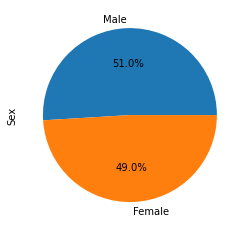

In [122]:
# Creating subset by grouping 'Sex' and 'Mouse ID' to count how many of each sex there is.
DrugGroupsSex = CleanMiceData.groupby('Sex')['Mouse ID'].count().sort_values(ascending = False)

# Setting pie plot properties
MouseGender_Pie = DrugGroupsSex.plot(kind='pie', y='Sex', autopct = '%1.1f%%')

# Setting the y-axis label for the pie chart
MouseGender_Pie.set_ylabel('Sex')
plt.show()

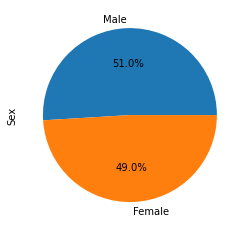

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MouseSex = ['Male', 'Female']

# Setting pie plot properties
plt.pie(DrugGroupsSex, labels = MouseSex, autopct="%1.1f%%", startangle=0)

# Setting the y-axis label for the pie chart
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [125]:
# Getting Maximum (greatest) Timepoint for each Mouse ID
DrugTumor = CleanMiceData[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
DrugTumor

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,0,Capomulin,45.000000
1,f932,0,Ketapril,45.000000
2,g107,0,Ketapril,45.000000
3,a457,0,Ketapril,45.000000
4,c819,0,Ketapril,45.000000
...,...,...,...,...
1888,r944,45,Capomulin,41.581521
1889,u364,45,Capomulin,31.023923
1890,p438,45,Ceftamin,61.433892
1891,x773,45,Placebo,58.634971


In [126]:
# Getting Maximum (greatest) Timepoint for each Mouse ID

# Creating another subset of main DataFrame to determine final Tumor Volume for each Mouse ID and drug regimen
FinalTumor = DrugTumor.loc[DrugTumor.groupby('Mouse ID')['Timepoint'].idxmax(), :]
FinalTumor



,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
1804,a203,45,Infubinol,67.973419
1786,a251,45,Infubinol,65.525743
1783,a262,45,Placebo,70.717621
1856,a275,45,Ceftamin,62.999356
1401,a366,30,Stelasyn,63.440686
...,...,...,...,...
499,z435,10,Propriva,48.710661
1799,z578,45,Ramicane,30.638696
1784,z581,45,Infubinol,62.754451
1887,z795,45,Naftisol,65.741070


In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    FilteredVolume = FinalTumor.loc[FinalTumor['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(FilteredVolume)
    
    # Determine outliers using upper and lower bounds and
    # Establishing upper and lower quantile boundary range
    quartiles = FilteredVolume.quantile([.25, .5, .75])
    
    # Establishing lower quartile at 25%
    lower_quartiles = quartiles[.25]
    
    # Establishing upper quartile at 75%
    upper_quartiles = quartiles[.75]
    
    # Calculating IQR
    iqr = upper_quartiles - lower_quartiles
    
    # Establishing lower and upper IQR boundaries
    lower_bound = lower_quartiles - (1.5 * iqr)
    upper_bound = upper_quartiles + (1.5 * iqr)
    
    # Establishing outliers using "or" (|). 
    outliers = FilteredVolume.loc[(FilteredVolume < lower_bound) | (FilteredVolume > upper_bound)]
   
    # Displaying outlier(s)
    print(f'{drug} Outliers:  {outliers}')
    


Capomulin Outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers:  420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


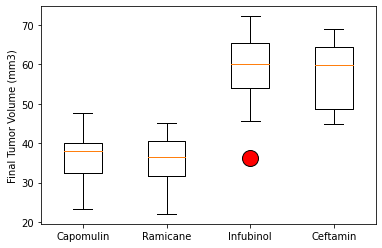

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plotting box plots and outlier for Capomulin, Ramicane, Infubinol, and Ceftamin
drug_outlier = {'markerfacecolor':'red', 'markersize': 16}

# Settting box plots properties and outlier for Capomulin, Ramicane, Infubinol, and Ceftamin
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops = drug_outlier)

# Labeling y axis
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

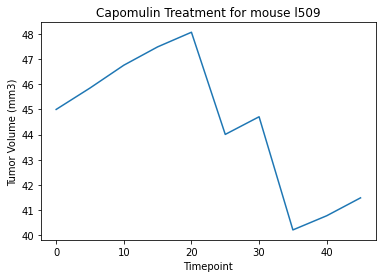

In [137]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Isolating the drug 'Capomulin' to plot against Tumor Volume
capo_mouse = CleanMiceData.loc[CleanMiceData['Drug Regimen'] == 'Capomulin']

# Choosing mouse l509 to plot in Line and Scatter plot
l509_mouse = CleanMiceData.loc[CleanMiceData['Mouse ID'] == 'l509']

# Setting plot properties for Mouse ID l509 Timepoint v. Tumor Volume (mm3)
l509_mouse.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', legend = False)

# Setting y axis label
plt.ylabel('Tumor Volume (mm3)')

# Setting Plot Title
plt.title('Capomulin Treatment for mouse l509')

plt.show()

In [131]:
# Display data set for reference
capo_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


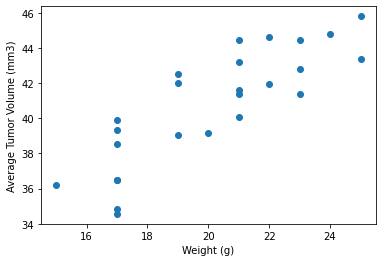

In [144]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculating average for tumor volume and mouse weight
mice_avg = capo_mouse.groupby('Mouse ID').mean()

# Setting up scatter plot properties
plt.scatter(mice_avg['Weight (g)'], mice_avg['Tumor Volume (mm3)'])

# Setting up x axis label
plt.xlabel('Weight (g)')

#Setting up y axis label
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

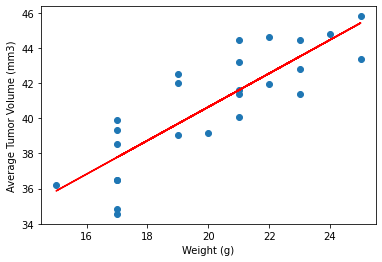

The Correlation Coefficient between Avg Weight and Avg. Tumor Volume is 0.8419363424694718
The Linear Regression between Avg. Weight and Avg. Tumor Volume is 0.9544396890241045


In [154]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculating slope, intercept, R-Value, P-Value, and Std. Error from Mean
mice_slope, mice_int, mice_r, mice_p, mice_std_err = st.linregress(mice_avg['Weight (g)'],
                                                                   mice_avg['Tumor Volume (mm3)'])

# Calculating Regression line
mice_fit = mice_slope * mice_avg['Weight (g)'] + mice_int

# Setting up scatter plot properties
plt.scatter(mice_avg['Weight (g)'], mice_avg['Tumor Volume (mm3)'])

# Setting up regression line properties
plt.plot(mice_avg['Weight (g)'], mice_fit, color = 'red')

# Setting up x axis and y axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

print(f"The Correlation Coefficient between Avg Weight and Avg. Tumor Volume is {(mice_r)}")
print(f"The Linear Regression between Avg. Weight and Avg. Tumor Volume is {mice_slope}")

In [ ]:
# Observations of the data:
# 1) Mice treated with Capomulin or Ramicane show smaller tumor volume over time; however, the drug
#    Capomulin seems to show a relapse in cancer.

# 2) The increase in average weight seems to correlate with larger tumor volume.  This does not mean the
#    heavier the mouse would result in cancer.  It could just be interpreted that a heavier mouse may
#    produce more tumor cells in porportion to weight.
#
# 3) The data also suggests that the drugs Infubinol, and Ceftamin are not as effective.  There is
#    one outlier from Infubinol, and may not have any significance on the overall study.